In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached yfinance-0.2.4-py2.py3-none-any.whl (51 kB)
  Using cached cryptography-39.0.0-cp36-abi3-manylinux_2_28_x86_64.whl (4.2 MB)
  Using cached frozendict-2.3.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (110 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
  Using cached soupsieve-2.3.2.post1-py3-none-any.whl (37 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Unins

In [18]:
#import libraries 
import numpy as np 
import pandas as pd 

import yfinance as yf 

import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
stocks = input("Enter the stock: ")
data = yf.download(stocks,"2010-01-01","2021-04-12", auto_adjust = True)
data.head()

Enter the stock: ^DJI
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00-05:00,10430.690430,10604.969727,10430.690430,10583.959961,179780000
2010-01-05 00:00:00-05:00,10584.559570,10584.559570,10522.519531,10572.019531,188540000
2010-01-06 00:00:00-05:00,10564.719727,10594.990234,10546.549805,10573.679688,186040000
2010-01-07 00:00:00-05:00,10571.110352,10612.370117,10505.209961,10606.860352,217390000
2010-01-08 00:00:00-05:00,10606.400391,10619.400391,10554.330078,10618.190430,172710000


In [10]:
data.shape

(2836, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2836 entries, 2010-01-04 00:00:00-05:00 to 2021-04-09 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2836 non-null   float64
 1   High    2836 non-null   float64
 2   Low     2836 non-null   float64
 3   Close   2836 non-null   float64
 4   Volume  2836 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.5 KB


In [12]:
data.describe()

,Open,High,Low,Close,Volume
count,2836.000000,2836.000000,2836.000000,2836.000000,2.836000e+03
mean,18763.666811,18863.286712,18659.863610,18768.458736,2.149367e+08
std,5928.099781,5958.449722,5897.387294,5927.932045,1.334388e+08
min,9686.480469,9770.870117,9614.320312,9686.480469,8.410000e+06
25%,13240.647461,13289.357666,13175.392334,13245.622314,1.074000e+08
50%,17666.549805,17756.169922,17569.799805,17673.919922,1.720750e+08
75%,24536.947754,24673.916992,24325.089355,24513.312500,2.990500e+08
max,33526.191406,33810.871094,33526.191406,33800.601562,9.159900e+08


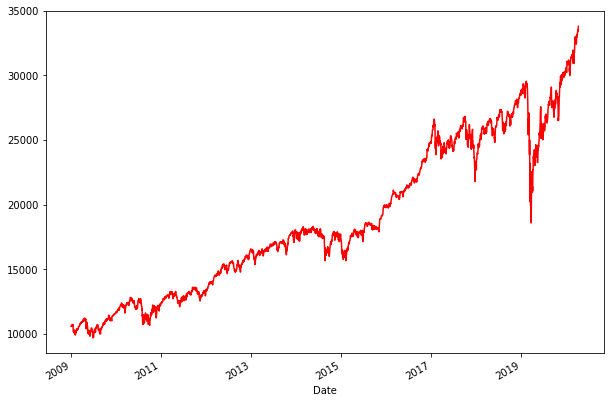

In [16]:
data.Close.plot(figsize=(10,7),color='r')

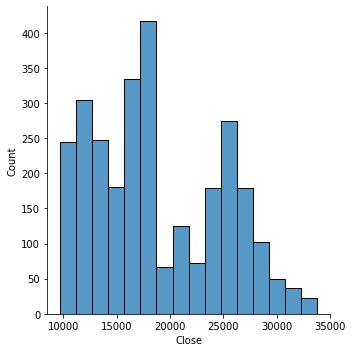

In [20]:
sns.displot(data["Close"])

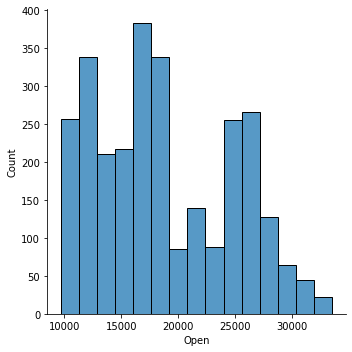

In [21]:
sns.displot(data["Open"])

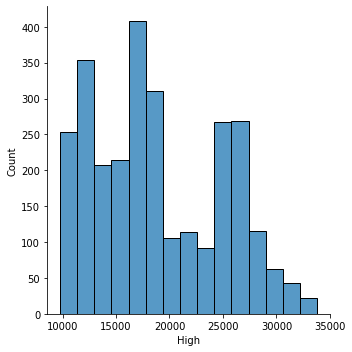

In [22]:
sns.displot(data["High"])

In [23]:
#Conclusions 

# - Shape of the data 
# - How the data is distributed 
# This data is non linear 
# 
# Lets see how the other models fair versus the Support Vector Machine

x = data.drop("Close",axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2268, 4)
(568, 4)
(2268,)
(568,)


In [24]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(x_train,y_train)
predict1 = lr.predict(x_test)

In [29]:
#MSE - mean squared error 
#RMSE - root mean square error 
#r2 square - 1.0 (is a good model)

from sklearn.metrics import mean_squared_error,r2_score
def metrics(y_test,y_pred):
  mse = mean_squared_error(y_test,y_pred) 
  rmse = np.sqrt(mse)
  r2_scores = r2_score(y_test,y_pred)
  print("MSE - ", mse)
  print("RMSE - ",rmse)
  print("r2_score - ",r2_scores )
metrics(y_test,predict1)

MSE -  4562.8237640385
RMSE -  67.54867699695161
r2_score -  0.9998702838795422


In [30]:
from sklearn.linear_model import Lasso,Ridge

lass = Lasso().fit(x_train,y_train)
ridg = Ridge().fit(x_train,y_train)

la_predict = lass.predict(x_test)
ridg_predict = ridg.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.226e+07, tolerance: 7.963e+06
  model = cd_fast.enet_coordinate_descent(


In [39]:
metrics(y_test,ridg_predict)

MSE -  4562.823843012714
RMSE -  67.54867758152423
r2_score -  0.999870283877297


In [43]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 

params = {'C':[0.1,1,10,100,1000],'gamma':[1,.1,.001,.0001],'kernel':['rbf']}
grid = GridSearchCV(SVR(),params,refit=True,verbose = 3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.034 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.030 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.049 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.020 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.045 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.034 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.030 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.049 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.020 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.045 total time=   0.2s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.034 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [48]:
svr = SVR(C=10,gamma = 0.01,kernel = 'rbf')
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
metrics(y_test,svr_pred)

MSE -  36029104.016067035
RMSE -  6002.4248446829415
r2_score -  -0.024268268559775263
